In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pandasgui import show

# Preliminaries

In [2]:
# Import baseline estimates
df = pd.read_excel('baseline_estimates.xlsx', parse_dates=['year'])

# Reshape GE(2) to calculate coefficient of variation
df.loc[df.definition == 'GE(2)', 'value'] = np.sqrt(2 * df.loc[df.definition == 'GE(2)', 'value'])
# df.loc[df.definition == 'GE_Within(2)', 'value'] = np.sqrt(2 * df.loc[df.definition == 'GE_Within(2)', 'value'])
# df.loc[df.definition == 'GE_Between(2)', 'value'] = np.sqrt(2 * df.loc[df.definition == 'GE_Between(2)', 'value'])

# Gini

In [3]:
df

,year,scalar,definition,region_id,region,value
0,2000-01-01,r(ede2),Yede(2),0,Philippines,0.000013
1,2000-01-01,r(ede1),Yede(1),0,Philippines,0.000119
2,2000-01-01,r(edehalf),Yede(0.5),0,Philippines,0.000373
3,2000-01-01,r(between_a2),Atkinson_Between(2),0,Philippines,0.965294
4,2000-01-01,r(between_a1),Atkinson_Between(1),0,Philippines,0.779375
...,...,...,...,...,...,...
5372,2018-01-01,r(N),Number of observations,0,Philippines,97.000000
5373,2018-01-01,r(sumw),Sum of weights,0,Philippines,17.000000
5374,2018-01-01,r(sd),Standard deviation,0,Philippines,0.001703
5375,2018-01-01,r(Var),Variance,0,Philippines,0.000003


## Philippines

In [4]:
# Analyze overall inequality in the Philippines
df_ph = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id']==0)]

In [5]:
# Tabulate overall inequality using different indices
df_ph.pivot_table(values='value', index='year', columns='definition')

definition,GE(-1),GE(0),GE(1),GE(2),Gini
year,,,,,
2000-01-01,28.759832,1.873526,1.147989,1.989383,0.757180
2001-01-01,25.920351,1.715815,1.044522,1.800316,0.735062
2002-01-01,18.851500,1.436144,0.895673,1.579038,0.693731
2003-01-01,15.685202,1.427913,0.887593,1.555171,0.690739
2004-01-01,10.530885,1.136474,0.727588,1.351958,0.638129
2005-01-01,20.437055,1.521589,0.982072,1.790346,0.712441
2006-01-01,17.270503,1.606645,1.084412,1.940511,0.738326
2007-01-01,15.758107,1.518281,1.000871,1.775893,0.721324
2008-01-01,21.726713,1.735520,1.095285,1.881584,0.745891


<AxesSubplot:xlabel='year', ylabel='Gini'>

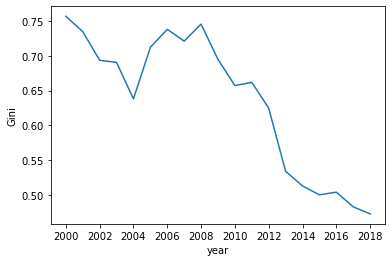

In [6]:
# Plot overall Gini coefficient
data = df_ph.pivot_table(values='value', index='year', columns='definition')
sns.lineplot(x=data.index, y='Gini', data=data)

## Subregions

In [7]:
# Match region ID with corresponding islands
luzon = [2, 3, 4, 5, 6, 7, 8, 10]
visayas = [11, 12, 13]
mindanao = [1, 9, 14, 15, 16, 17]

### Luzon

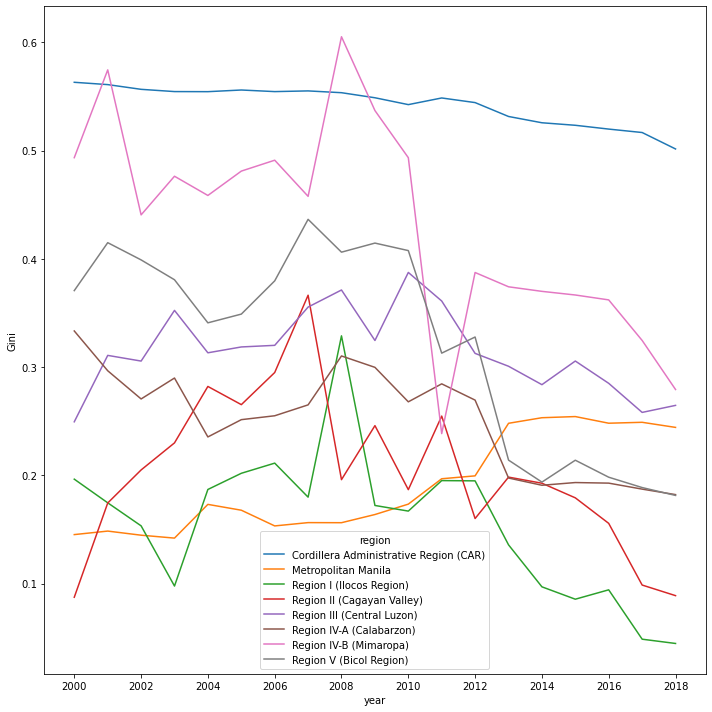

In [8]:
# Plot overall Gini for regions in Luzon
df_luzon = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(luzon))]
data = df_luzon.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='Gini', hue='region', data=data)
fig.tight_layout()

In [9]:
# Tabulate regions in Luzon according to average Gini
df_luzon.loc[df_luzon['definition']=='Gini'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Cordillera Administrative Region (CAR),2,0.542634
Region IV-B (Mimaropa),8,0.432137
Region V (Bicol Region),10,0.322632
Region III (Central Luzon),6,0.314734
Region IV-A (Calabarzon),7,0.251227
Region II (Cagayan Valley),5,0.203302
Metropolitan Manila,3,0.190425
Region I (Ilocos Region),4,0.156127


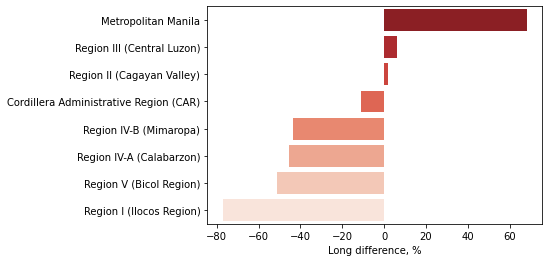

In [10]:
# Calculate long differences
df_luzon_longdiff = df_luzon.loc[df_luzon['definition']=='Gini'].groupby(['region']).first().join(df_luzon.loc[df_luzon['definition']=='Gini'].groupby(['region']).last(), rsuffix='_r')
df_luzon_longdiff = df_luzon_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_luzon_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_luzon_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Reds_r')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

### Visayas

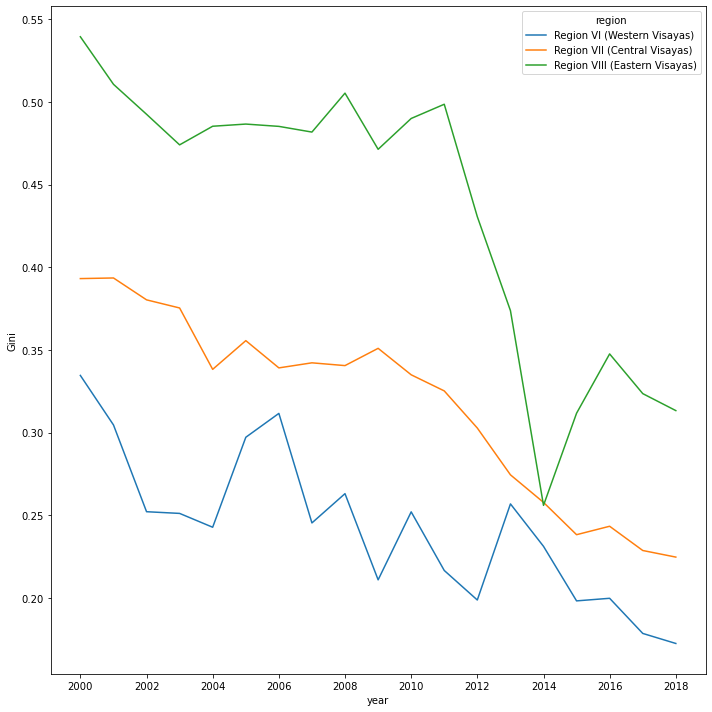

In [11]:
# Plot overall Gini for regions in Visayas
df_visayas = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(visayas))]
data = df_visayas.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='Gini', hue='region', data=data)
fig.tight_layout()

In [12]:
# Tabulate regions in Visayas according to average Gini
df_visayas.loc[df_visayas['definition']=='Gini'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Region VIII (Eastern Visayas),13,0.435692
Region VII (Central Visayas),12,0.317820
Region VI (Western Visayas),11,0.242962


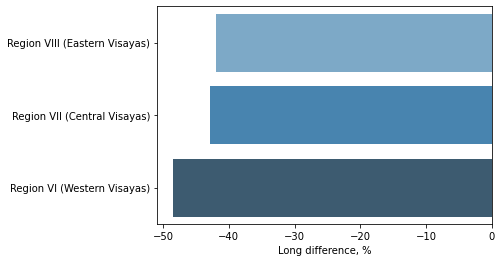

In [13]:
# Calculate long differences
df_visayas_longdiff = df_visayas.loc[df_visayas['definition']=='Gini'].groupby(['region']).first().join(df_visayas.loc[df_visayas['definition']=='Gini'].groupby(['region']).last(), rsuffix='_r')
df_visayas_longdiff = df_visayas_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_visayas_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_visayas_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Blues_d')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

### Mindanao

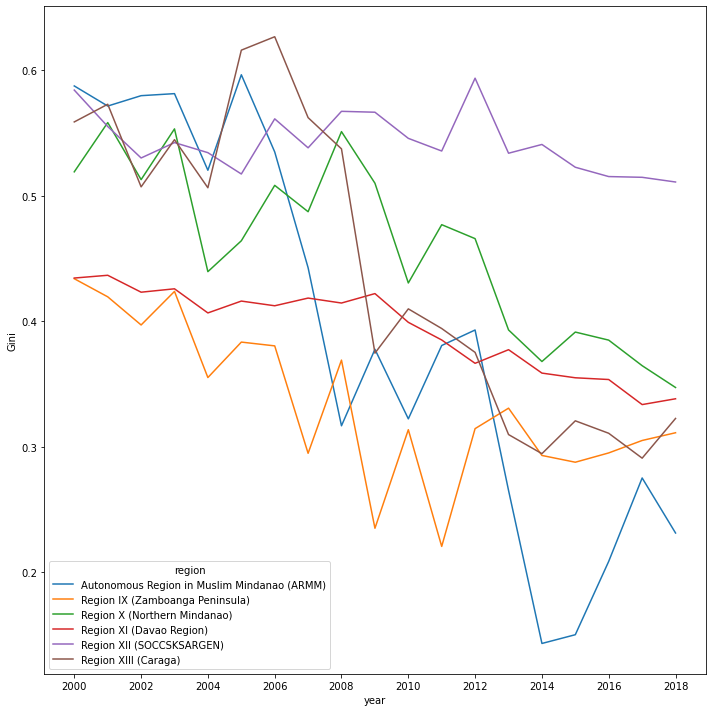

In [14]:
# Plot overall Gini for regions in Mindanao
df_mindanao = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(mindanao))]
data = df_mindanao.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='Gini', hue='region', data=data)
fig.tight_layout()

In [15]:
# Tabulate regions in Mindanao according to average Gini
df_mindanao.loc[df_mindanao['definition']=='Gini'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Region XII (SOCCSKSARGEN),16,0.542746
Region X (Northern Mindanao),14,0.459395
Region XIII (Caraga),17,0.444079
Autonomous Region in Muslim Mindanao (ARMM),1,0.393737
Region XI (Davao Region),15,0.393676
Region IX (Zamboanga Peninsula),9,0.335061


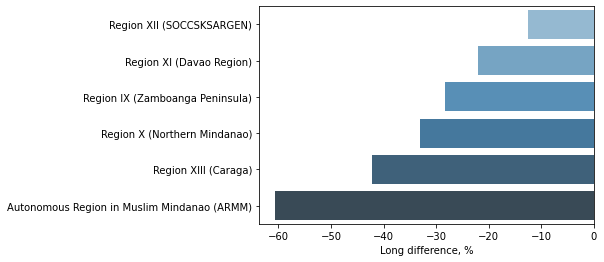

In [16]:
# Calculate long differences
df_mindanao_longdiff = df_mindanao.loc[df_mindanao['definition']=='Gini'].groupby(['region']).first().join(df_mindanao.loc[df_mindanao['definition']=='Gini'].groupby(['region']).last(), rsuffix='_r')
df_mindanao_longdiff = df_mindanao_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_mindanao_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_mindanao_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Blues_d')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

# GE(1): Theil Index

In [17]:
df

,year,scalar,definition,region_id,region,value
0,2000-01-01,r(ede2),Yede(2),0,Philippines,0.000013
1,2000-01-01,r(ede1),Yede(1),0,Philippines,0.000119
2,2000-01-01,r(edehalf),Yede(0.5),0,Philippines,0.000373
3,2000-01-01,r(between_a2),Atkinson_Between(2),0,Philippines,0.965294
4,2000-01-01,r(between_a1),Atkinson_Between(1),0,Philippines,0.779375
...,...,...,...,...,...,...
5372,2018-01-01,r(N),Number of observations,0,Philippines,97.000000
5373,2018-01-01,r(sumw),Sum of weights,0,Philippines,17.000000
5374,2018-01-01,r(sd),Standard deviation,0,Philippines,0.001703
5375,2018-01-01,r(Var),Variance,0,Philippines,0.000003


## Philippines

In [18]:
# Analyze overall inequality in the Philippines
df_ph = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id']==0)]

In [19]:
# Tabulate overall inequality using different indices
df_ph.pivot_table(values='value', index='year', columns='definition')

definition,GE(-1),GE(0),GE(1),GE(2),Gini
year,,,,,
2000-01-01,28.759832,1.873526,1.147989,1.989383,0.757180
2001-01-01,25.920351,1.715815,1.044522,1.800316,0.735062
2002-01-01,18.851500,1.436144,0.895673,1.579038,0.693731
2003-01-01,15.685202,1.427913,0.887593,1.555171,0.690739
2004-01-01,10.530885,1.136474,0.727588,1.351958,0.638129
2005-01-01,20.437055,1.521589,0.982072,1.790346,0.712441
2006-01-01,17.270503,1.606645,1.084412,1.940511,0.738326
2007-01-01,15.758107,1.518281,1.000871,1.775893,0.721324
2008-01-01,21.726713,1.735520,1.095285,1.881584,0.745891


<AxesSubplot:xlabel='year', ylabel='GE(1)'>

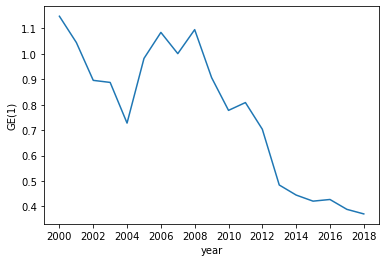

In [20]:
# Plot overall Gini coefficient
data = df_ph.pivot_table(values='value', index='year', columns='definition')
sns.lineplot(x=data.index, y='GE(1)', data=data)

In [21]:
# Analyze decomposition of inequality in the Philippines
df_ph_deco = df.loc[(df['definition'].isin(['GE(1)', 'GE_Within(1)', 'GE_Between(1)'])) & (df['region_id']==0)]
df_ph_deco.pivot_table(values='value', index='year', columns='definition')

definition,GE(1),GE_Between(1),GE_Within(1)
year,,,
2000-01-01,1.147989,0.907667,0.240321
2001-01-01,1.044522,0.768236,0.276286
2002-01-01,0.895673,0.638254,0.257418
2003-01-01,0.887593,0.611277,0.276316
2004-01-01,0.727588,0.465050,0.262538
2005-01-01,0.982072,0.747160,0.234912
2006-01-01,1.084412,0.849446,0.234967
2007-01-01,1.000871,0.767853,0.233018
2008-01-01,1.095285,0.844466,0.250819


In [22]:
data = df_ph_deco.pivot_table(values='value', index='year', columns='definition')
data = data.assign(GE_Between_share = lambda x: 100 * (x['GE_Between(1)'] / x['GE(1)']),
                   GE_Within_share = lambda x: 100 - x.GE_Between_share,
                   GE_Total = lambda x: x.GE_Between_share + x.GE_Within_share)

In [23]:
data

definition,GE(1),GE_Between(1),GE_Within(1),GE_Between_share,GE_Within_share,GE_Total
year,,,,,,
2000-01-01,1.147989,0.907667,0.240321,79.065874,20.934126,100.0
2001-01-01,1.044522,0.768236,0.276286,73.549048,26.450952,100.0
2002-01-01,0.895673,0.638254,0.257418,71.259774,28.740226,100.0
2003-01-01,0.887593,0.611277,0.276316,68.869025,31.130975,100.0
2004-01-01,0.727588,0.465050,0.262538,63.916654,36.083346,100.0
2005-01-01,0.982072,0.747160,0.234912,76.079946,23.920054,100.0
2006-01-01,1.084412,0.849446,0.234967,78.332349,21.667651,100.0
2007-01-01,1.000871,0.767853,0.233018,76.718462,23.281538,100.0
2008-01-01,1.095285,0.844466,0.250819,77.100114,22.899886,100.0


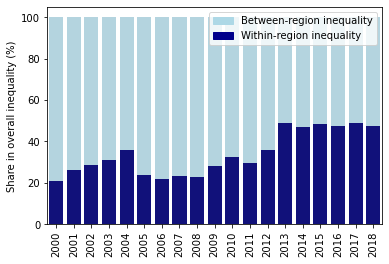

In [24]:
ax = sns.barplot(x=data.index.year, y='GE_Total', data=data, color='lightblue')
sns.barplot(x=data.index.year, y='GE_Within_share', data=data, color='darkblue', ax=ax)

ax.set(xlabel='', ylabel='Share in overall inequality (%)')
plt.xticks(rotation=90)

top_bar = mpatches.Patch(color='lightblue', label='Between-region inequality')
bottom_bar = mpatches.Patch(color='darkblue', label='Within-region inequality')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

## Subregions

In [25]:
# Match region ID with corresponding islands
luzon = [2, 3, 4, 5, 6, 7, 8, 10]
visayas = [11, 12, 13]
mindanao = [1, 9, 14, 15, 16, 17]

### Luzon

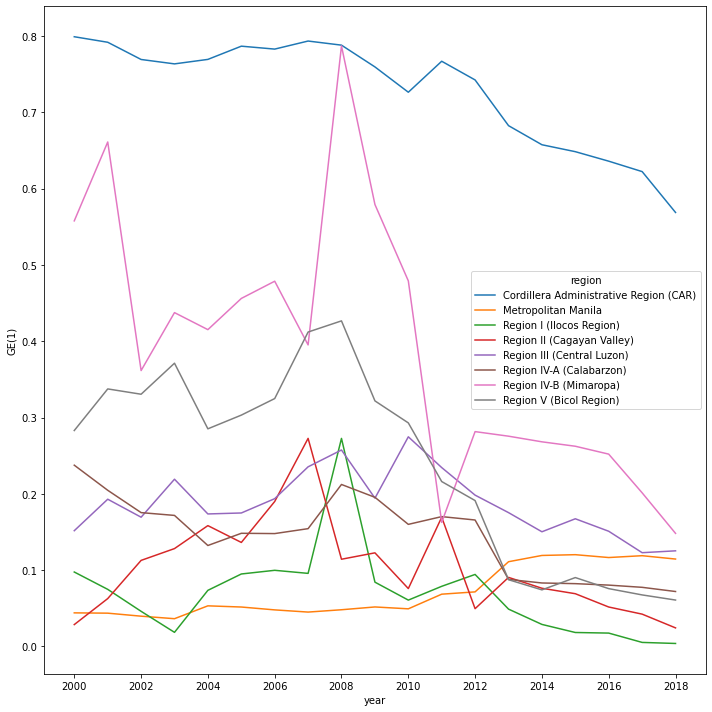

In [26]:
# Plot overall Gini for regions in Luzon
df_luzon = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(luzon))]
data = df_luzon.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='GE(1)', hue='region', data=data)
fig.tight_layout()

In [27]:
# Tabulate regions in Luzon according to average Gini
df_luzon.loc[df_luzon['definition']=='GE(1)'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Cordillera Administrative Region (CAR),2,0.729255
Region IV-B (Mimaropa),8,0.392699
Region V (Bicol Region),10,0.239658
Region III (Central Luzon),6,0.187552
Region IV-A (Calabarzon),7,0.145276
Region II (Cagayan Valley),5,0.104046
Metropolitan Manila,3,0.071183
Region I (Ilocos Region),4,0.069249


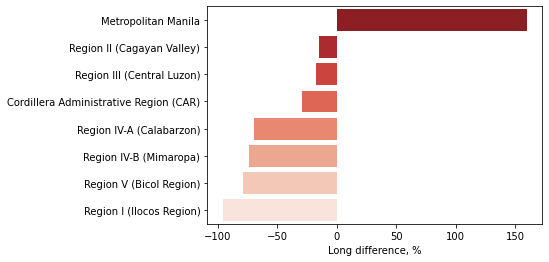

In [28]:
# Calculate long differences
df_luzon_longdiff = df_luzon.loc[df_luzon['definition']=='GE(1)'].groupby(['region']).first().join(df_luzon.loc[df_luzon['definition']=='GE(1)'].groupby(['region']).last(), rsuffix='_r')
df_luzon_longdiff = df_luzon_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_luzon_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_luzon_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Reds_r')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

### Visayas

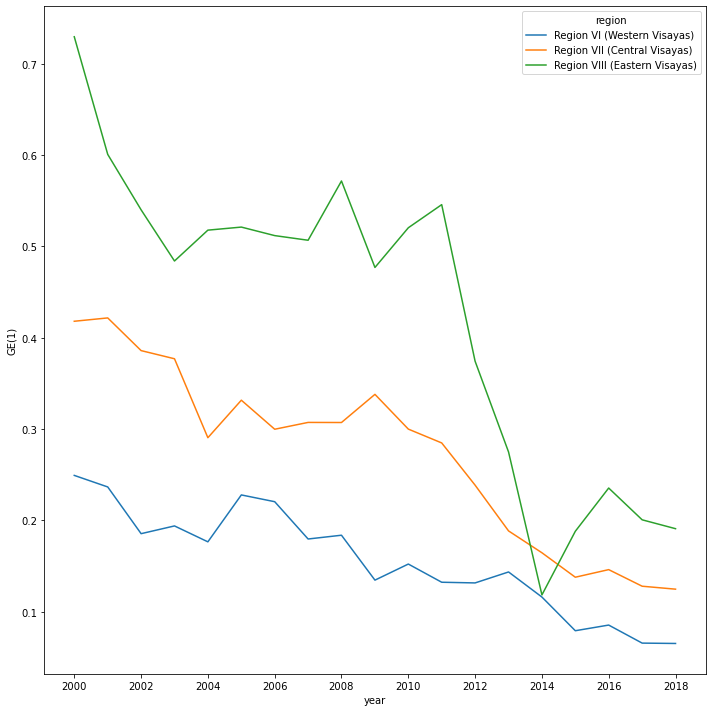

In [29]:
# Plot overall Gini for regions in Visayas
df_visayas = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(visayas))]
data = df_visayas.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='GE(1)', hue='region', data=data)
fig.tight_layout()

In [30]:
# Tabulate regions in Visayas according to average Gini
df_visayas.loc[df_visayas['definition']=='GE(1)'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Region VIII (Eastern Visayas),13,0.426817
Region VII (Central Visayas),12,0.273193
Region VI (Western Visayas),11,0.155808


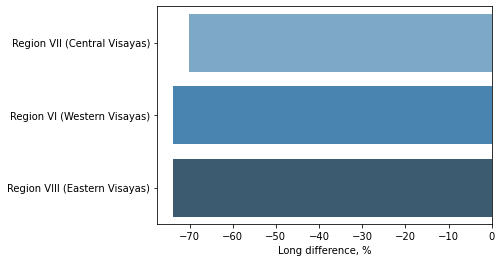

In [31]:
# Calculate long differences
df_visayas_longdiff = df_visayas.loc[df_visayas['definition']=='GE(1)'].groupby(['region']).first().join(df_visayas.loc[df_visayas['definition']=='GE(1)'].groupby(['region']).last(), rsuffix='_r')
df_visayas_longdiff = df_visayas_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_visayas_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_visayas_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Blues_d')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

### Mindanao

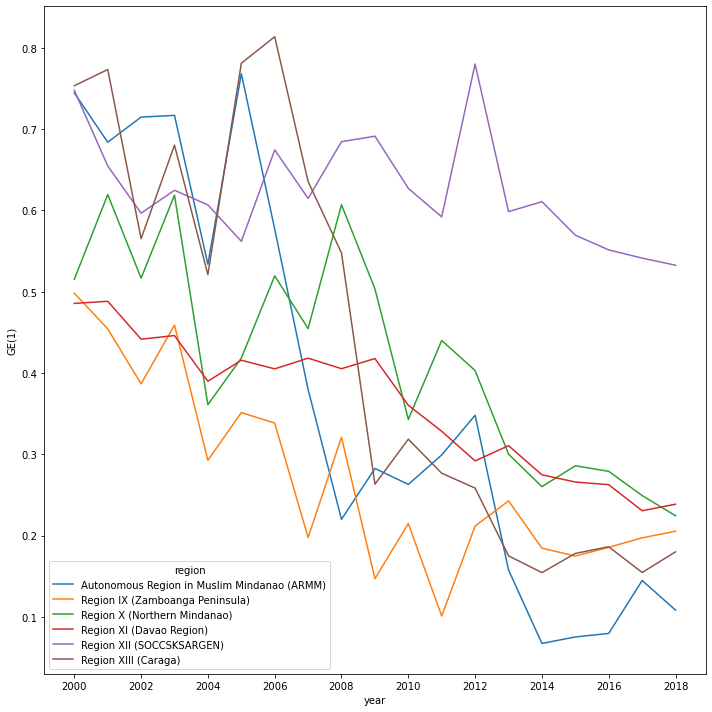

In [32]:
# Plot overall Gini for regions in Mindanao
df_mindanao = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(mindanao))]
data = df_mindanao.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='GE(1)', hue='region', data=data)
fig.tight_layout()

In [33]:
# Tabulate regions in Mindanao according to average Gini
df_mindanao.loc[df_mindanao['definition']=='GE(1)'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Region XII (SOCCSKSARGEN),16,0.624377
Region XIII (Caraga),17,0.432539
Region X (Northern Mindanao),14,0.416874
Autonomous Region in Muslim Mindanao (ARMM),1,0.377171
Region XI (Davao Region),15,0.362025
Region IX (Zamboanga Peninsula),9,0.271852


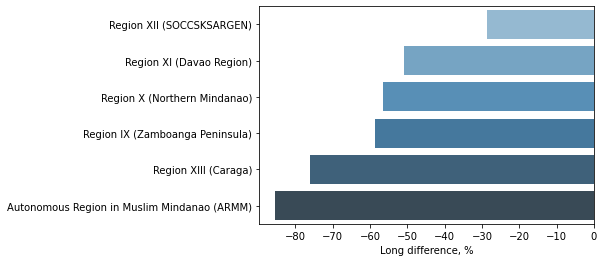

In [34]:
# Calculate long differences
df_mindanao_longdiff = df_mindanao.loc[df_mindanao['definition']=='GE(1)'].groupby(['region']).first().join(df_mindanao.loc[df_mindanao['definition']=='GE(1)'].groupby(['region']).last(), rsuffix='_r')
df_mindanao_longdiff = df_mindanao_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_mindanao_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_mindanao_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Blues_d')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

# GE(2): Coefficient of variation

In [35]:
df

,year,scalar,definition,region_id,region,value
0,2000-01-01,r(ede2),Yede(2),0,Philippines,0.000013
1,2000-01-01,r(ede1),Yede(1),0,Philippines,0.000119
2,2000-01-01,r(edehalf),Yede(0.5),0,Philippines,0.000373
3,2000-01-01,r(between_a2),Atkinson_Between(2),0,Philippines,0.965294
4,2000-01-01,r(between_a1),Atkinson_Between(1),0,Philippines,0.779375
...,...,...,...,...,...,...
5372,2018-01-01,r(N),Number of observations,0,Philippines,97.000000
5373,2018-01-01,r(sumw),Sum of weights,0,Philippines,17.000000
5374,2018-01-01,r(sd),Standard deviation,0,Philippines,0.001703
5375,2018-01-01,r(Var),Variance,0,Philippines,0.000003


## Philippines

In [36]:
# Analyze overall inequality in the Philippines
df_ph = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id']==0)]

In [37]:
# Tabulate overall inequality using different indices
df_ph.pivot_table(values='value', index='year', columns='definition')

definition,GE(-1),GE(0),GE(1),GE(2),Gini
year,,,,,
2000-01-01,28.759832,1.873526,1.147989,1.989383,0.757180
2001-01-01,25.920351,1.715815,1.044522,1.800316,0.735062
2002-01-01,18.851500,1.436144,0.895673,1.579038,0.693731
2003-01-01,15.685202,1.427913,0.887593,1.555171,0.690739
2004-01-01,10.530885,1.136474,0.727588,1.351958,0.638129
2005-01-01,20.437055,1.521589,0.982072,1.790346,0.712441
2006-01-01,17.270503,1.606645,1.084412,1.940511,0.738326
2007-01-01,15.758107,1.518281,1.000871,1.775893,0.721324
2008-01-01,21.726713,1.735520,1.095285,1.881584,0.745891


<AxesSubplot:xlabel='year', ylabel='GE(2)'>

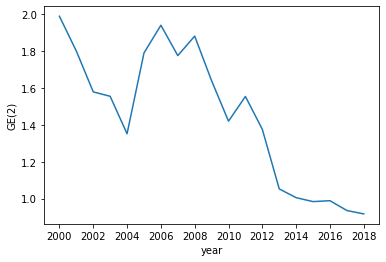

In [38]:
# Plot overall Gini coefficient
data = df_ph.pivot_table(values='value', index='year', columns='definition')
sns.lineplot(x=data.index, y='GE(2)', data=data)

In [39]:
# Analyze decomposition of inequality in the Philippines
df_ph_deco = df.loc[(df['definition'].isin(['GE_Within(2)', 'GE_Between(2)'])) & (df['region_id']==0)]
df_ph_deco.pivot_table(values='value', index='year', columns='definition')

definition,GE_Between(2),GE_Within(2)
year,,
2000-01-01,1.665804,0.313020
2001-01-01,1.276210,0.344360
2002-01-01,0.936531,0.310150
2003-01-01,0.892360,0.316920
2004-01-01,0.607699,0.306197
2005-01-01,1.291102,0.311567
2006-01-01,1.560893,0.321898
2007-01-01,1.271028,0.305870
2008-01-01,1.424818,0.345362


In [40]:
data = df_ph_deco.pivot_table(values='value', index='year', columns='definition')
data = data.assign(GE_Between_share = lambda x: 100 * (x['GE_Between(2)'] / (x['GE_Between(2)'] + x['GE_Within(2)'])),
                   GE_Within_share = lambda x: 100 - x.GE_Between_share,
                   GE_Total = lambda x: x.GE_Between_share + x.GE_Within_share)

In [41]:
data

definition,GE_Between(2),GE_Within(2),GE_Between_share,GE_Within_share,GE_Total
year,,,,,
2000-01-01,1.665804,0.313020,84.181530,15.818470,100.0
2001-01-01,1.276210,0.344360,78.750705,21.249295,100.0
2002-01-01,0.936531,0.310150,75.121959,24.878041,100.0
2003-01-01,0.892360,0.316920,73.792684,26.207316,100.0
2004-01-01,0.607699,0.306197,66.495411,33.504589,100.0
2005-01-01,1.291102,0.311567,80.559496,19.440504,100.0
2006-01-01,1.560893,0.321898,82.903137,17.096863,100.0
2007-01-01,1.271028,0.305870,80.603040,19.396960,100.0
2008-01-01,1.424818,0.345362,80.490024,19.509976,100.0


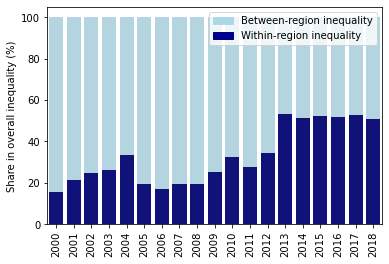

In [42]:
ax = sns.barplot(x=data.index.year, y='GE_Total', data=data, color='lightblue')
sns.barplot(x=data.index.year, y='GE_Within_share', data=data, color='darkblue', ax=ax)

ax.set(xlabel='', ylabel='Share in overall inequality (%)')
plt.xticks(rotation=90)

top_bar = mpatches.Patch(color='lightblue', label='Between-region inequality')
bottom_bar = mpatches.Patch(color='darkblue', label='Within-region inequality')
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

## Subregions

In [43]:
# Match region ID with corresponding islands
luzon = [2, 3, 4, 5, 6, 7, 8, 10]
visayas = [11, 12, 13]
mindanao = [1, 9, 14, 15, 16, 17]

### Luzon

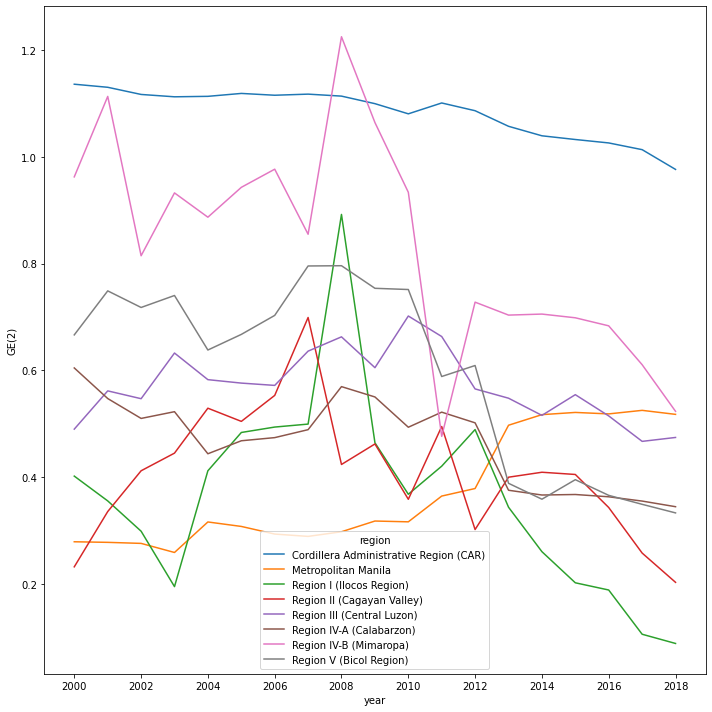

In [44]:
# Plot overall Gini for regions in Luzon
df_luzon = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(luzon))]
data = df_luzon.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='GE(2)', hue='region', data=data)
fig.tight_layout()

In [45]:
# Tabulate regions in Luzon according to average Gini
df_luzon.loc[df_luzon['definition']=='GE(2)'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Cordillera Administrative Region (CAR),2,1.083260
Region IV-B (Mimaropa),8,0.833323
Region V (Bicol Region),10,0.598184
Region III (Central Luzon),6,0.572049
Region IV-A (Calabarzon),7,0.466741
Region II (Cagayan Valley),5,0.408914
Metropolitan Manila,3,0.372092
Region I (Ilocos Region),4,0.366475


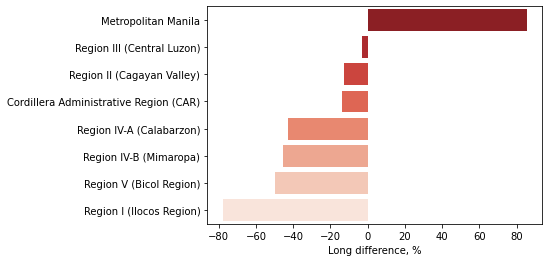

In [46]:
# Calculate long differences
df_luzon_longdiff = df_luzon.loc[df_luzon['definition']=='GE(2)'].groupby(['region']).first().join(df_luzon.loc[df_luzon['definition']=='GE(2)'].groupby(['region']).last(), rsuffix='_r')
df_luzon_longdiff = df_luzon_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_luzon_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_luzon_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Reds_r')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

### Visayas

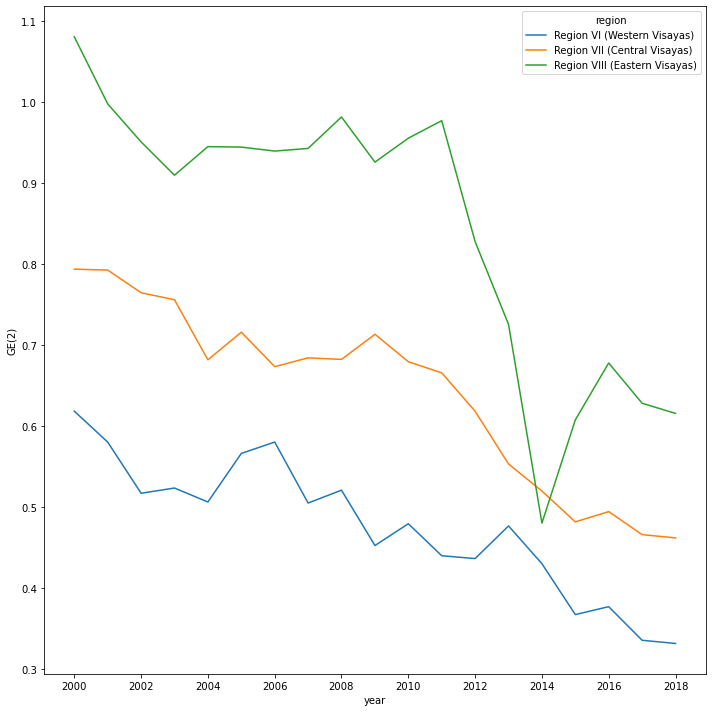

In [47]:
# Plot overall Gini for regions in Visayas
df_visayas = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(visayas))]
data = df_visayas.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='GE(2)', hue='region', data=data)
fig.tight_layout()

In [48]:
# Tabulate regions in Visayas according to average Gini
df_visayas.loc[df_visayas['definition']=='GE(2)'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Region VIII (Eastern Visayas),13,0.848211
Region VII (Central Visayas),12,0.642114
Region VI (Western Visayas),11,0.476094


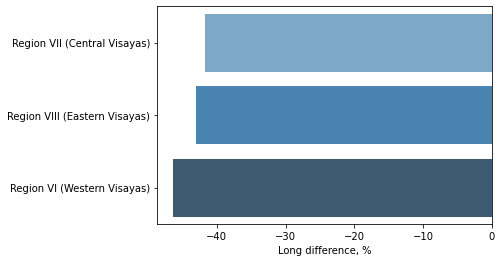

In [49]:
# Calculate long differences
df_visayas_longdiff = df_visayas.loc[df_visayas['definition']=='GE(2)'].groupby(['region']).first().join(df_visayas.loc[df_visayas['definition']=='GE(2)'].groupby(['region']).last(), rsuffix='_r')
df_visayas_longdiff = df_visayas_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_visayas_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_visayas_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Blues_d')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()

### Mindanao

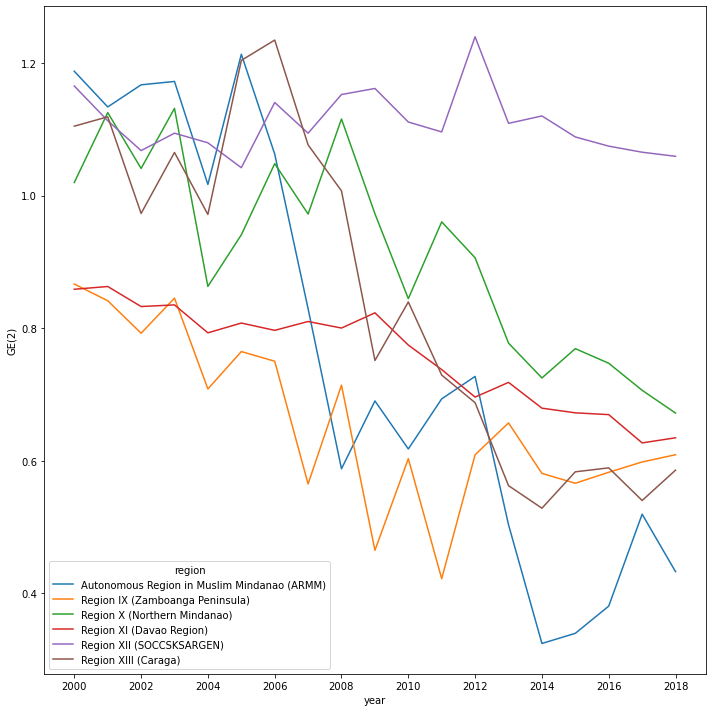

In [50]:
# Plot overall Gini for regions in Mindanao
df_mindanao = df.loc[(df['definition'].isin(['Gini', 'GE(-1)', 'GE(0)', 'GE(1)', 'GE(2)'])) & (df['region_id'].isin(mindanao))]
data = df_mindanao.pivot_table(values='value', index=['region', 'year'], columns='definition').reset_index()
fig,ax = plt.subplots(figsize=(10, 10))
ax = sns.lineplot(x='year', y='GE(2)', hue='region', data=data)
fig.tight_layout()

In [51]:
# Tabulate regions in Mindanao according to average Gini
df_mindanao.loc[df_mindanao['definition']=='GE(2)'].groupby(['region']).mean().sort_values(by='value', ascending=False)

,region_id,value
region,,
Region XII (SOCCSKSARGEN),16,1.109272
Region X (Northern Mindanao),14,0.912612
Region XIII (Caraga),17,0.850230
Autonomous Region in Muslim Mindanao (ARMM),1,0.768479
Region XI (Davao Region),15,0.759533
Region IX (Zamboanga Peninsula),9,0.660153


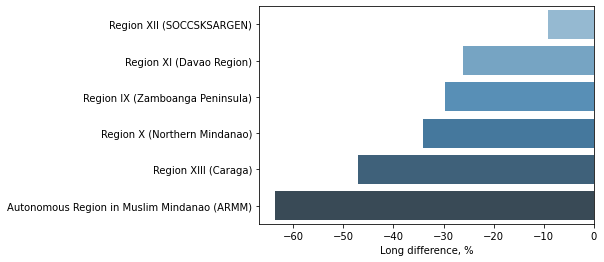

In [52]:
# Calculate long differences
df_mindanao_longdiff = df_mindanao.loc[df_mindanao['definition']=='GE(2)'].groupby(['region']).first().join(df_mindanao.loc[df_mindanao['definition']=='GE(2)'].groupby(['region']).last(), rsuffix='_r')
df_mindanao_longdiff = df_mindanao_longdiff.assign(longdiff = lambda x: 100 * ((x.value_r / x.value) - 1))
df_mindanao_longdiff.sort_values(by='longdiff', ascending=False, inplace=True)

# Plot long differences
data = df_mindanao_longdiff
ax = sns.barplot(x='longdiff', y=data.index, data=data, palette='Blues_d')
ax.set(xlabel='Long difference, %', ylabel='')
plt.show()